In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_7_image_16_4_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_12_image_4_2_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_7_image_9_3_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_17_image_20_3_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_20_image_5_1_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_21_image_17_2_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_11_image_2_2_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-dist

In [15]:
pip install -q tensorflow==2.12.0 protobuf==3.20.3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 109.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 72.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 89.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 3.4 MB/s eta 0:00:00
 

In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


from tensorflow.keras.preprocessing.image import (ImageDataGenerator,load_img,img_to_array)

In [21]:
import os

data_dir = "/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam"

IMAGE_EXTS = (".jpg", ".jpeg", ".png")

class_counts = {}

for cls in os.listdir(data_dir):
    cls_path = os.path.join(data_dir, cls)
    if not os.path.isdir(cls_path):
        continue

    count = 0
    for root, _, files in os.walk(cls_path):
        for f in files:
            if f.lower().endswith(IMAGE_EXTS):
                count += 1

    class_counts[cls] = count

class_counts


{'planet': 1472,
 'galaxy': 3984,
 'black hole': 656,
 'asteroid': 283,
 'comet': 416,
 'star': 3269,
 'constellation': 1552,
 'nebula': 1192}

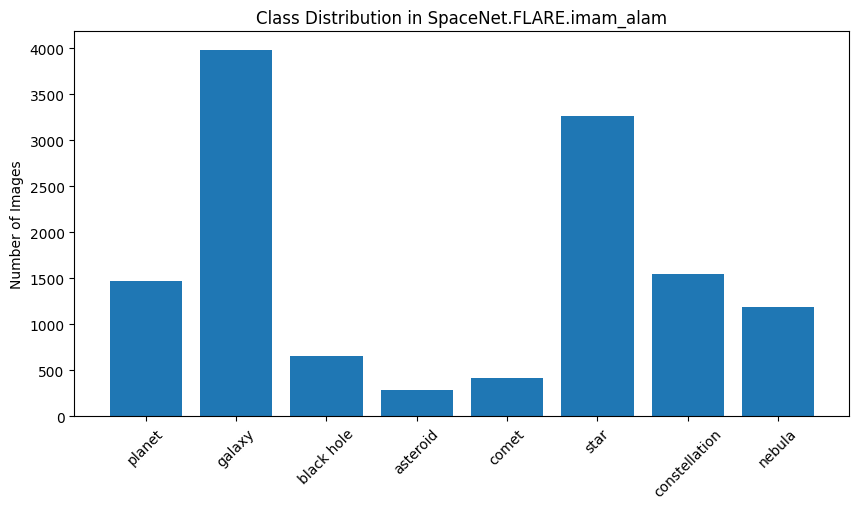

In [22]:
plt.figure(figsize=(10,5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=45)
plt.title("Class Distribution in SpaceNet.FLARE.imam_alam")
plt.ylabel("Number of Images")
plt.show()


In [29]:
TARGET_CLASS = "planet"
TARGET_COUNT = class_counts[TARGET_CLASS]

TARGET_COUNT


1472

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode="nearest"
)


In [33]:
OUTPUT_DIR = "/kaggle/working/augmented_data"
os.makedirs(OUTPUT_DIR, exist_ok=True)


In [34]:
MINORITY_CLASSES = ["nebula", "asteroid", "comet", "black hole"]

for cls in MINORITY_CLASSES:
    src_cls_path = os.path.join(data_dir, cls)
    dst_cls_path = os.path.join(OUTPUT_DIR, cls)
    os.makedirs(dst_cls_path, exist_ok=True)

    current_count = class_counts[cls]

    if current_count >= TARGET_COUNT:
        continue

    print(f"Augmenting {cls}: {current_count} → {TARGET_COUNT}")

    # Collect all image paths recursively
    image_paths = []
    for root, _, files in os.walk(src_cls_path):
        for f in files:
            if f.lower().endswith(IMAGE_EXTS):
                image_paths.append(os.path.join(root, f))

    i = 0
    while current_count < TARGET_COUNT:
        img_path = image_paths[i % len(image_paths)]
        img = load_img(img_path)
        img_array = img_to_array(img)
        img_array = img_array.reshape((1,) + img_array.shape)

        aug_iter = datagen.flow(
            img_array,
            batch_size=1,
            save_to_dir=dst_cls_path,   
            save_prefix="aug",
            save_format="jpg"
        )

        next(aug_iter)
        current_count += 1
        i += 1


Augmenting nebula: 1192 → 1472
Augmenting asteroid: 283 → 1472
Augmenting comet: 416 → 1472
Augmenting black hole: 656 → 1472


In [35]:
def count_augmented(dir_path):
    return len([
        f for f in os.listdir(dir_path)
        if f.lower().endswith(IMAGE_EXTS)
    ])

for cls in MINORITY_CLASSES:
    print(
        cls,
        "original:", class_counts[cls],
        "augmented:", count_augmented(os.path.join(OUTPUT_DIR, cls))
    )


nebula original: 1192 augmented: 277
asteroid original: 283 augmented: 1109
comet original: 416 augmented: 1003
black hole original: 656 augmented: 784
